Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

df = pd.read_csv('/content/dataset.csv')
df.head(10)

# Any results you write to the current directory are saved as output.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Counting types values

**EDA EXPLORATION******

<Axes: >

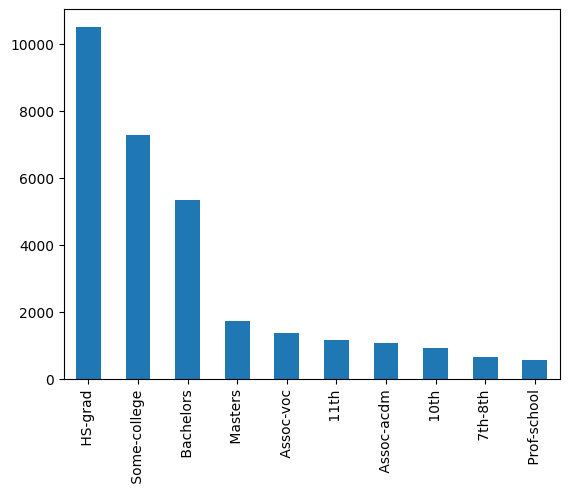

In [4]:
df[' education'].value_counts().head(10).plot.bar()

<Axes: >

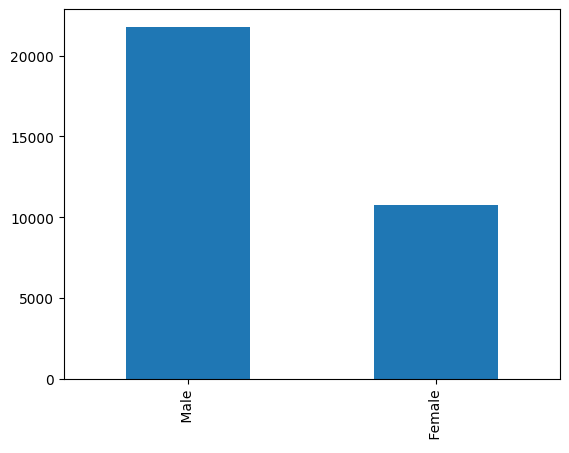

In [5]:
df[' sex'].value_counts().head(10).plot.bar()

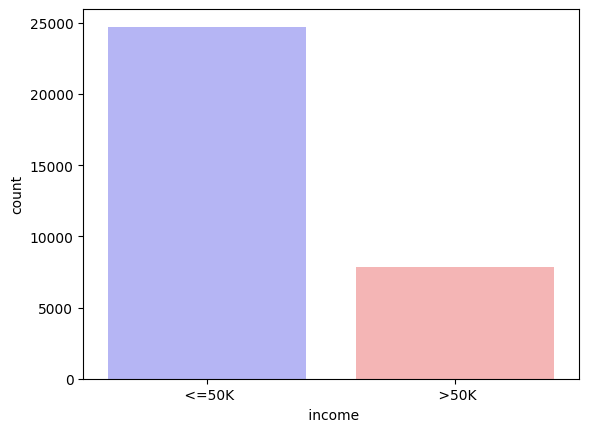

In [6]:
sns.countplot(x=" income", data=df, palette="bwr")
plt.show()

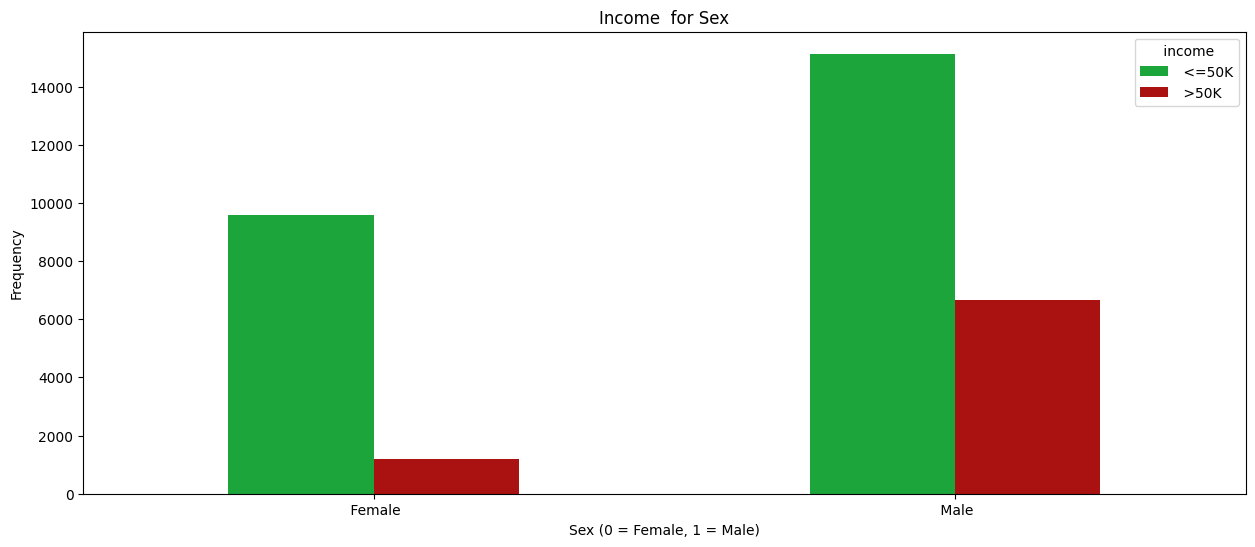

In [7]:
pd.crosstab(df[' sex'],df[' income']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Income  for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

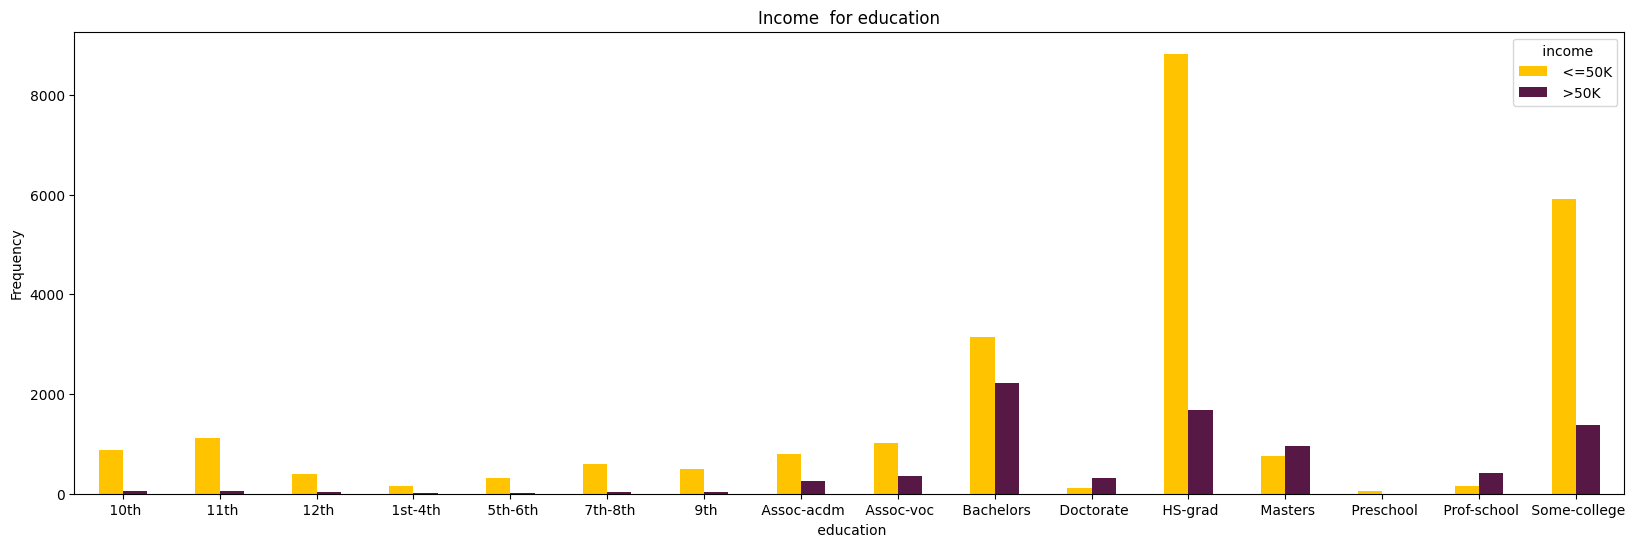

In [8]:
pd.crosstab(df[' education'],df[' income']).plot(kind="bar",figsize=(20,6),color=['#FFC300','#581845' ])
plt.title('Income  for education')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Treating the categorical variables

In [9]:
df_treat = pd.get_dummies(df)
df_treat.dtypes.value_counts()
df_treat = df_treat.rename(columns=({' income_ <=50K':'minusEqual50',' income_ >50K':'Plus50'}))
df_treat.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,minusEqual50,Plus50
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,49,160187,5,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,31,45781,14,14084,0,50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,42,159449,13,5178,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Dropping target values and trasform it in dataframe

In [10]:
temp= [df_treat['minusEqual50'],df_treat['Plus50']]
y= pd.DataFrame(temp)
y= y.transpose()
x = df_treat.drop(columns=['minusEqual50','Plus50'])



Classification

We have a binary classification:

person with income <=50K
person with income >50K


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [13]:
model_LR.fit(x_train,y_train['minusEqual50'])

LogisticRegression()

In [14]:
y_prob = model_LR.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(x_test, y_pred)


from sklearn.model_selection import cross_val_score
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test['minusEqual50'],y_pred)
confusion_matrix

array([[ 424, 1147],
       [ 158, 4784]])

ROC AUC SCORE

In [15]:
auc_roc=metrics.roc_auc_score(y_test['minusEqual50'],y_pred)
auc_roc

0.6189604633352233

In [16]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test['minusEqual50'], y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5945291285982965

Text(0.5, 0, 'False Positive Rate')

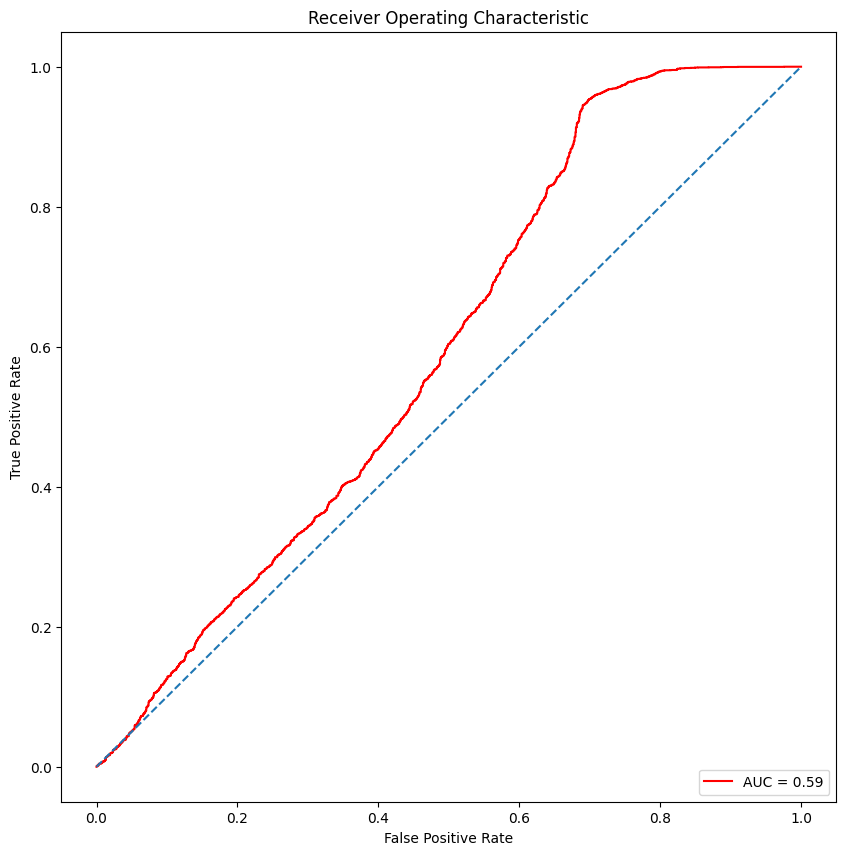

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Plotting the ROC curve in order to evaluate the classification

Confusion Matrix

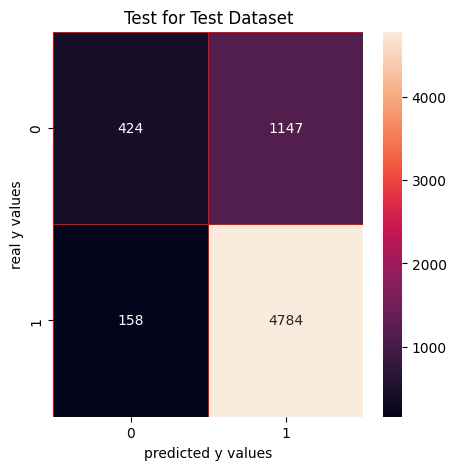

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix=metrics.confusion_matrix(y_test['minusEqual50'],y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

**MLPClassifier**



In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train['minusEqual50'])

MLPClassifier()

In [20]:
y_prob = mlp.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(x_test, y_pred)

1.0

In [21]:
confusion_matrix=metrics.confusion_matrix(y_test['minusEqual50'],y_pred)
confusion_matrix


array([[ 687,  884],
       [ 588, 4354]])

In [22]:
auc_roc=metrics.classification_report(y_test['minusEqual50'],y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.54      0.44      0.48      1571\n           1       0.83      0.88      0.86      4942\n\n    accuracy                           0.77      6513\n   macro avg       0.69      0.66      0.67      6513\nweighted avg       0.76      0.77      0.77      6513\n'

In [23]:
auc_roc=metrics.roc_auc_score(y_test['minusEqual50'],y_pred)
auc_roc

0.6591604560708161

In [24]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test['minusEqual50'], y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7127510438721247

Text(0.5, 0, 'False Positive Rate')

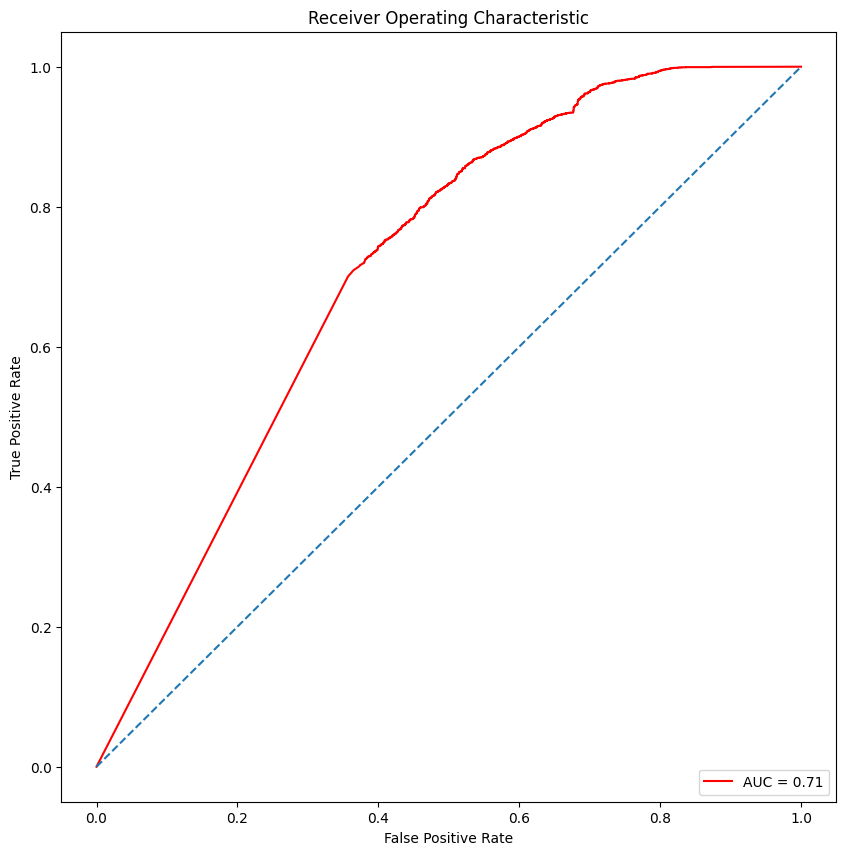

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

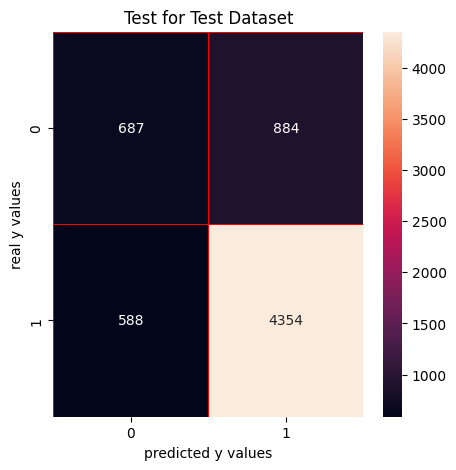

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix=metrics.confusion_matrix(y_test['minusEqual50'],y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()